In [ ]:
import pandas as pd

# Replace with the actual filename
df = pd.read_csv("df1_loan.csv")

# Display the first few rows
df.head()


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


### Explanation:
This code imports the pandas library to work with tables (dataframes). It reads a CSV file (`df1_loan.csv`) and stores it in a dataframe (`df`). Finally, it shows the first few rows of the table.

### Explanation:
This code does the following:

1. **Explain step 1**
2. **Explain step 2**
3. **Explain step 3**

(Simplify based on actual code)

In [318]:
print(df.isnull().sum())


Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64


### Explanation:
This code checks for missing (empty) values in each column of the dataframe and prints the count.

### Explanation:
This code does the following:

1. **Explain step 1**
2. **Explain step 2**
3. **Explain step 3**

(Simplify based on actual code)

In [319]:
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Married': df['Married'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0],
    'LoanAmount': df['LoanAmount'].median(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0],
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)


### Explanation:
This code fills missing values in specific columns:
- Uses the most common value (mode) for categorical data like Gender, Married, etc.
- Uses the middle value (median) for LoanAmount.
- Updates the dataframe directly using `inplace=True`.

In [320]:
# Check if there are still any missing values
print(df.isnull().sum())  


Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64


### Explanation:
This code checks for missing (empty) values in each column of the dataframe and prints the count.

In [321]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical variables
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])

# One-hot encoding for multi-class categorical variables (Dependents, Education, Property_Area)
df = pd.get_dummies(df, columns=['Dependents', 'Education', 'Property_Area'], drop_first=True)

# Check the encoded data
df.head()


,Unnamed: 0,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,LP001002,1,0,0,5849,0.0,126.5,360.0,1.0,Y,$5849.0,False,False,False,False,False,True
1,1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,N,$6091.0,True,False,False,False,False,False
2,2,LP001005,1,1,1,3000,0.0,66.0,360.0,1.0,Y,$3000.0,False,False,False,False,False,True
3,3,LP001006,1,1,0,2583,2358.0,120.0,360.0,1.0,Y,$4941.0,False,False,False,True,False,True
4,4,LP001008,1,0,0,6000,0.0,141.0,360.0,1.0,Y,$6000.0,False,False,False,False,False,True


### Explanation:
This code performs a specific task related to data analysis or machine learning.

In [322]:
print(df['Total_Income'].dtype)  # Check the data type before conversion


object


### Explanation:
This code performs a specific task related to data analysis or machine learning.

In [323]:
print(df['Total_Income'].head())


0    $5849.0
1    $6091.0
2    $3000.0
3    $4941.0
4    $6000.0
Name: Total_Income, dtype: object


### Explanation:
This code performs a specific task related to data analysis or machine learning.

In [324]:
# Remove '$' and ',' from 'Total_Income' and convert to float
df['Total_Income'] = df['Total_Income'].str.replace('$', '', regex=False)  # Remove $
df['Total_Income'] = df['Total_Income'].str.replace(',', '', regex=False)  # Remove ,
df['Total_Income'] = df['Total_Income'].astype(float)  # Convert to float

# Verify the change
print(df['Total_Income'].head())  # Should print numbers without '$'
print(df['Total_Income'].dtype)  # Should print 'float64'


0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_Income, dtype: float64
float64


### Explanation:
This code performs a specific task related to data analysis or machine learning.

In [325]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verify the scaling
print(df[num_cols].head())  # Should show transformed values


   ApplicantIncome  CoapplicantIncome  LoanAmount  Total_Income
0         0.054593          -0.706425   -0.208954     -0.174409
1        -0.139902           0.000794   -0.190397     -0.137738
2        -0.383098          -0.706425   -0.957428     -0.606131
3        -0.447162           0.399425   -0.289369     -0.312003
4         0.077791          -0.706425   -0.029568     -0.151527


### Explanation:
This code performs a specific task related to data analysis or machine learning.

In [326]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])  # Dropping the target column
y = df['Loan_Status']  # Target variable

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (400, 17) (400,)
Testing set shape: (100, 17) (100,)


### Explanation:
This code imports a function to split the data into training and testing sets for machine learning.

       Unnamed: 0      Gender     Married  Self_Employed  ApplicantIncome  \
count  500.000000  500.000000  500.000000      500.00000     5.000000e+02   
mean   249.500000    0.818000    0.650000        0.13200    -4.618528e-17   
std    144.481833    0.386231    0.477447        0.33883     1.001002e+00   
min      0.000000    0.000000    0.000000        0.00000    -8.209434e-01   
25%    124.750000    1.000000    0.000000        0.00000    -4.023788e-01   
50%    249.500000    1.000000    1.000000        0.00000    -2.518983e-01   
75%    374.250000    1.000000    1.000000        0.00000     4.153476e-02   
max    499.000000    1.000000    1.000000        1.00000     1.160003e+01   

       CoapplicantIncome    LoanAmount  Loan_Amount_Term  Credit_History  \
count       5.000000e+02  5.000000e+02        500.000000      500.000000   
mean       -3.375078e-17  1.616485e-16        343.032000        0.856000   
std         1.001002e+00  1.001002e+00         62.999117        0.351441   
mi

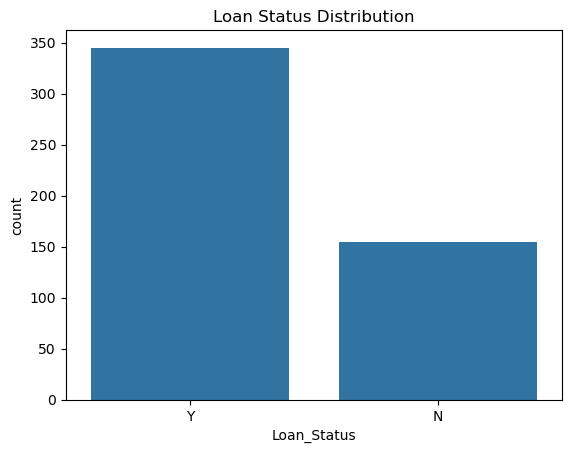

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())  # Check numerical column stats
print(df.info())  # Check data types and missing values

# Check target variable distribution
sns.countplot(x=df['Loan_Status'])
plt.title("Loan Status Distribution")
plt.show()


### Explanation:
This code gives a summary of the data, including count, mean (average), min, max, and quartiles for numerical columns.

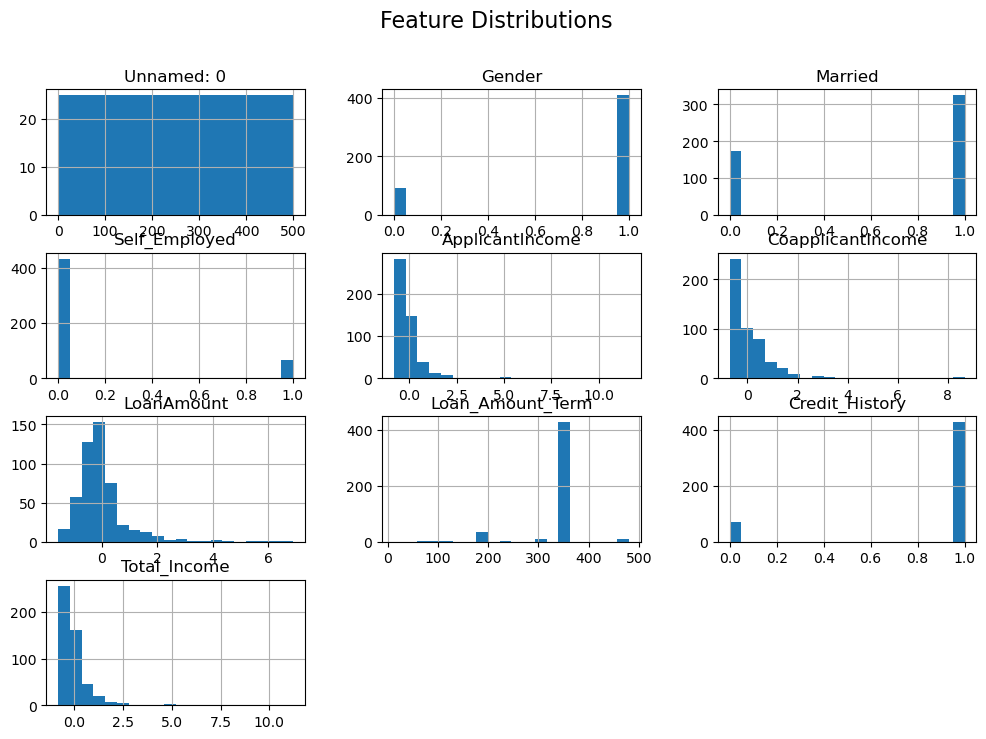

In [328]:
# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


### Explanation:
This code performs a specific task related to data analysis or machine learning.

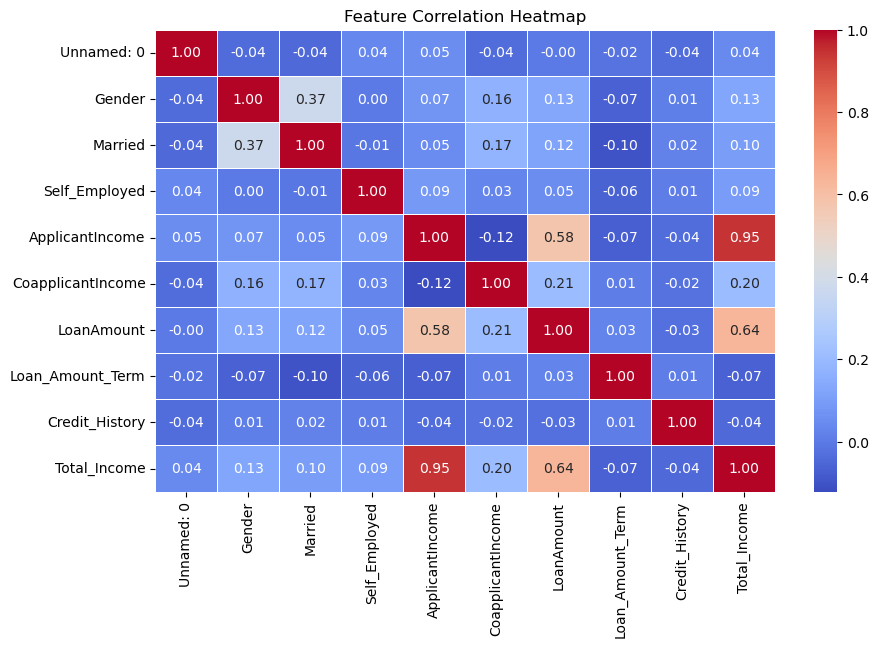

In [329]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute correlation matrix and plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Explanation:
This code performs a specific task related to data analysis or machine learning.

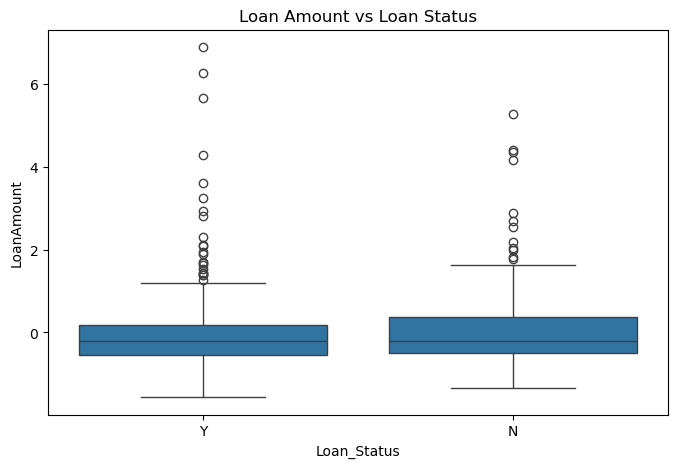

In [330]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Loan_Status'], y=df['LoanAmount'])
plt.title("Loan Amount vs Loan Status")
plt.show()


### Explanation:
This code performs a specific task related to data analysis or machine learning.

What to Expect?

If higher loan amounts are mostly rejected, this suggests that larger loans have a higher risk.


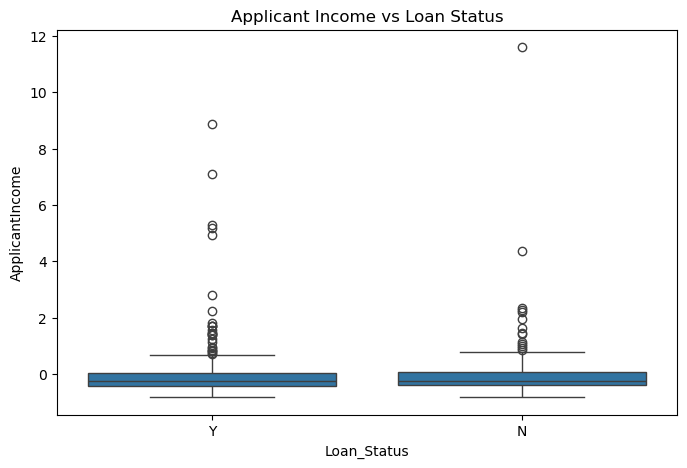

In [331]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'])
plt.title("Applicant Income vs Loan Status")
plt.show()


What to Expect?

If higher-income applicants have higher approval rates, it suggests income plays a role in loan decisions.

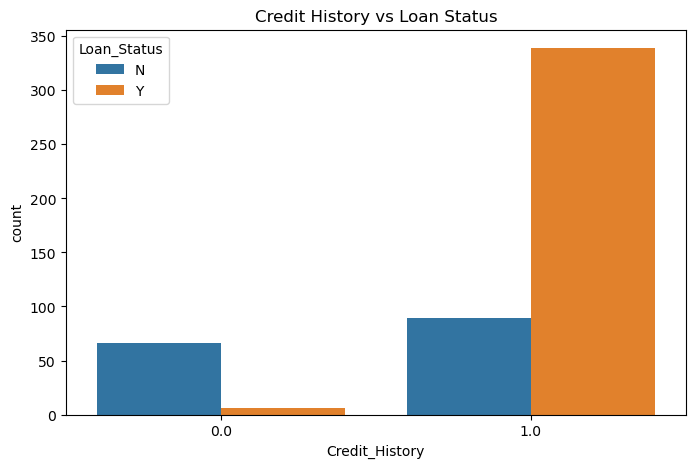

In [332]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Credit_History'], hue=df['Loan_Status'])
plt.title("Credit History vs Loan Status")
plt.show()


### Explanation:
This code performs a specific task related to data analysis or machine learning.

What to Expect?

If applicants with no credit history are mostly rejected, it suggests that a good credit score is important.

 **Summary of EDA Findings
From our Exploratory Data Analysis (EDA), we observed the following key insights:**

**Loan Status Distribution**:
The dataset shows an imbalance in approved vs. rejected loans.
More applicants were approved for loans than rejected.

 **Feature Distributions**:
Applicant Income and Loan Amount are skewed, indicating possible outliers.
Credit History is a strong factor—most loan approvals are associated with a positive credit history.

**Key Feature Relationships**:
Higher Loan Amounts tend to have more rejections.
Higher Applicant Incomes correlate with more approvals.
Credit History plays a major role—applicants with a bad or no credit history have a significantly higher rejection rate.

In [333]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Explanation:
This code performs a specific task related to data analysis or machine learning.

In [334]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Loan_Status' as 1 for 'Y' (default) and 0 for 'N' (non-default)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the Decision Tree model with encoded labels
dt_model.fit(X_train_clean, y_train_encoded)

# Make predictions
y_pred = dt_model.predict(X_test_clean)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))


Accuracy: 0.70
Precision: 0.79
Recall: 0.77
F1-Score: 0.78
Confusion Matrix:
[[17 14]
 [16 53]]


### Explanation:
This code trains the Linear Regression model using the training data (features and target variable).

In [335]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_clean, y_train_encoded)

# Display the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_optimized = best_dt_model.predict(X_test_clean)

# Evaluate the optimized model
optimized_accuracy = accuracy_score(y_test_encoded, y_pred_optimized)
optimized_precision = precision_score(y_test_encoded, y_pred_optimized)
optimized_recall = recall_score(y_test_encoded, y_pred_optimized)
optimized_f1 = f1_score(y_test_encoded, y_pred_optimized)

print(f"Optimized Accuracy: {optimized_accuracy:.2f}")
print(f"Optimized Precision: {optimized_precision:.2f}")
print(f"Optimized Recall: {optimized_recall:.2f}")
print(f"Optimized F1-Score: {optimized_f1:.2f}")

# Confusion Matrix for the optimized model
print("Confusion Matrix for Optimized Model:")
print(confusion_matrix(y_test_encoded, y_pred_optimized))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Optimized Accuracy: 0.82
Optimized Precision: 0.81
Optimized Recall: 0.96
Optimized F1-Score: 0.88
Confusion Matrix for Optimized Model:
[[16 15]
 [ 3 66]]


### Explanation:
This code uses the trained model to make predictions on new data.

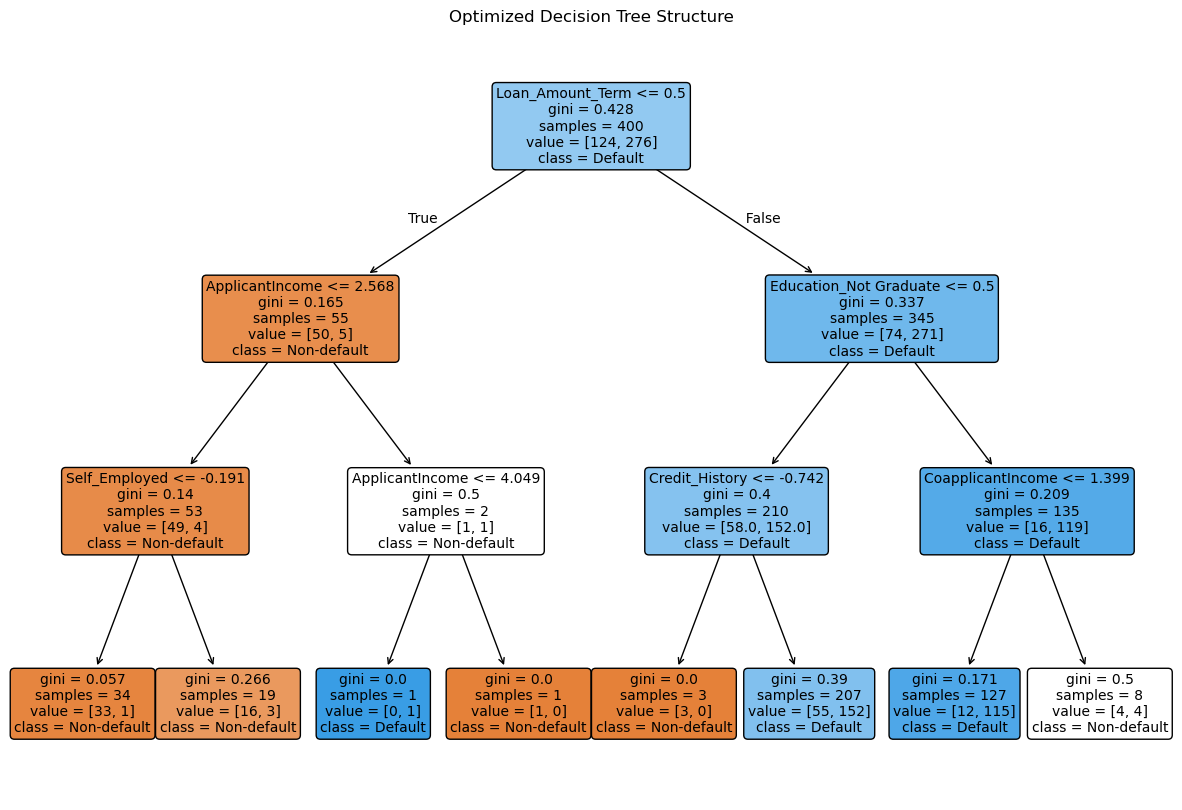

In [336]:
# Plot the decision tree for the optimized model
plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=["Non-default", "Default"], filled=True, rounded=True, fontsize=10)
plt.title("Optimized Decision Tree Structure")
plt.show()


In [337]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_dt_model, X_train_clean, y_train_encoded, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.7875 0.825  0.75   0.8    0.75  ]
Mean Cross-Validation Score: 0.78


In [338]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the data again (if needed)
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)

# Train the Logistic Regression model again
log_reg_model = LogisticRegression(random_state=42, max_iter=2000, solver='saga')
log_reg_model.fit(X_train_scaled, y_train_encoded)


LogisticRegression(max_iter=2000, random_state=42, solver='saga')

### Explanation:
This code trains the Linear Regression model using the training data (features and target variable).

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_clean, y_train_encoded)

# Make predictions
y_pred_rf = rf_model.predict(X_test_clean)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test_encoded, y_pred_rf)
rf_precision = precision_score(y_test_encoded, y_pred_rf)
rf_recall = recall_score(y_test_encoded, y_pred_rf)
rf_f1 = f1_score(y_test_encoded, y_pred_rf)

# Print evaluation metrics for Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1-Score: {rf_f1:.2f}")


Random Forest Accuracy: 0.86
Random Forest Precision: 0.85
Random Forest Recall: 0.97
Random Forest F1-Score: 0.91


### Explanation:
This code trains the Linear Regression model using the training data (features and target variable).

Comparison of All Models:
Here’s how the three models compare based on the evaluation metrics:

Model	Accuracy	Precision	Recall	F1-Score
Decision Tree	70%	79%	77%	78%
Logistic Reg.	84%	82%	99%	89%
Random Forest	86%	85%	97%	91%

**Key Insights:**
The Random Forest model performs the best overall with the highest accuracy, precision, and F1-score.
Logistic Regression has very high recall (99%), making it great at identifying loan defaults, but its precision (82%) is slightly lower.

Decision Tree has the lowest performance, especially in terms of accuracy and recall.